In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import json, re
from unittest import mock
import sys,os
sys.path.append('/Users/krishansubudhi/repos/prepareai')
import tool
import importlib
importlib.reload(tool)

<module 'tool' from '/Users/krishansubudhi/repos/prepareai/tool.py'>

In [ ]:

filename = '../training_data_log.jsonl'
df = pd.read_json(filename, lines=True)

print("DataFrame Info:")
df.info()

Number of prompts containing the keyword 'learning': 34


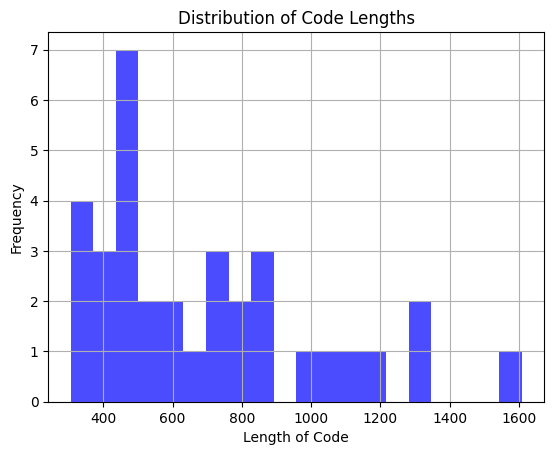

In [5]:
# Example: Count occurrences of a specific keyword in 'prompt'
keyword = 'learning'
keyword_count = df['prompt'].str.contains(keyword, case=False).sum()
print(f"Number of prompts containing the keyword '{keyword}': {keyword_count}")

# Example: Plot the distribution of code lengths
df['code_length'] = df['code'].apply(len)
df['code_length'].hist(bins=20, color='blue', alpha=0.7)
plt.title("Distribution of Code Lengths")
plt.xlabel("Length of Code")
plt.ylabel("Frequency")
plt.show()

In [9]:
TRAINING_DATA_DIR = "unlabeled_data"
def save_training_data(index, prompt, code, overwrite = False):
    directory = f"{TRAINING_DATA_DIR}/iter1_{index}"
    if os.path.exists(directory) and not overwrite:
        raise Exception(f"Data with Index {index} already exists.")
    os.mkdir(directory)
    print(directory)
    with open(f"{directory}/prompt.md", 'w') as f:
        f.write(prompt)
    with open(f"{directory}/code.md", 'w') as f:
        f.write(code)

In [12]:
for i, row in df.iterrows():
    save_training_data(i, row.prompt, row.code)

unlabeled_data/iter1_0
unlabeled_data/iter1_1
unlabeled_data/iter1_2
unlabeled_data/iter1_3
unlabeled_data/iter1_4
unlabeled_data/iter1_5
unlabeled_data/iter1_6
unlabeled_data/iter1_7
unlabeled_data/iter1_8
unlabeled_data/iter1_9
unlabeled_data/iter1_10
unlabeled_data/iter1_11
unlabeled_data/iter1_12
unlabeled_data/iter1_13
unlabeled_data/iter1_14
unlabeled_data/iter1_15
unlabeled_data/iter1_16
unlabeled_data/iter1_17
unlabeled_data/iter1_18
unlabeled_data/iter1_19
unlabeled_data/iter1_20
unlabeled_data/iter1_21
unlabeled_data/iter1_22
unlabeled_data/iter1_23
unlabeled_data/iter1_24
unlabeled_data/iter1_25
unlabeled_data/iter1_26
unlabeled_data/iter1_27
unlabeled_data/iter1_28
unlabeled_data/iter1_29
unlabeled_data/iter1_30
unlabeled_data/iter1_31
unlabeled_data/iter1_32
unlabeled_data/iter1_33


In [95]:
new_code = r'''```python
# Adding recursion to the root of the learning plan, similar to other algorithm-related subjects.
self.tools['LearningPlanManager'].add_subject(
    subject_name="Recursion", 
    importance=1
)

self.tools['LearningPlanManager'].add_subject(
    subject_name="Recursion Concepts and Common Problems", 
    importance=1,
    parent_subject="Recursion"
)

self.tools['LearningPlanManager'].add_subject(
    subject_name="Tree and Graph Traversal", 
    importance=0.9,
    parent_subject="Recursion"
)

self.tools['LearningPlanManager'].add_subject(
    subject_name="Recursion Complexity Analysis",
    importance=0.5,
    parent_subject="Recursion"
)

self.tools['LearningPlanManager'].add_subject(
    subject_name="Debugging Recursion", 
    importance=0.2,
    parent_subject="Recursion"
)


# Locking the updated learning plan with the new recursion subjects.
self.tools['LearningPlanManager'].lock_new_plan(recursion_plan)

# Responding to the student with an engaging message.
self.tools['Responder'].respond(
    f"Ah, that's a tricky subject! 🔍 I've added a dedicated section on recursion to your learning plan. \n\n"
    f"{self.tools['LearningPlanManager'].get_plan_tree_markdown('Recursion')}\n\n"
    "Would you like to start by exploring Recursion Concepts and Common Problems?"
)
```'''

# Save the training data
save_training_data(index, df.iloc[index].prompt, new_code)


labeled_data/33


# Verification

In [11]:
import os

mock_tool = tool.Tool()

mock_tool.tools = mock.MagicMock()

for dir in os.listdir("labeled_data"):
    display(Markdown(f"# Example {dir}"))
    code = open(f"labeled_data/{dir}/code.md", 'r').read()
    # display(Markdown(code))
    code = code.replace("self.","")
    # display(Markdown(code))
    mock_tool._execute_code(code)

# Example 32

```python

# Define the goal and concise special instruction based on the student's needs.
goal = "Enhance understanding of algorithms and data structures"
special_instruction = (
    "Focus on fundamental concepts, clear explanations, and interactive exercises."
)

# Updating memory with goal
tools['MemoryManager'].update_memory('goal', goal)

# Suggest a learning plan for algorithms and data structures with the modified goal and instruction.
learning_plan = tools['LearningPlanManager'].suggest_learning_plan(
    goal=goal,
    special_instruction=special_instruction
)

# Responding to the user to confirm the locking of the plan and encourage them to dive into the learning material.
tools['Responder'].respond(
    "I've built a customized learning plan focusing on algorithms and data structures! 🎉\n\n"
    f"{learning_plan}\n\n"
    "Let me know if you want me to lock it. If you want to add or remove subjects, I can do that too!"
)
```

# Example 33

```python
# Adding recursion to the root of the learning plan, similar to other algorithm-related subjects.
tools['LearningPlanManager'].add_subject(
    subject_name="Recursion", 
    importance=1
)

tools['LearningPlanManager'].add_subject(
    subject_name="Recursion Concepts and Common Problems", 
    importance=1,
    parent_subject="Recursion"
)

tools['LearningPlanManager'].add_subject(
    subject_name="Tree and Graph Traversal", 
    importance=0.9,
    parent_subject="Recursion"
)

tools['LearningPlanManager'].add_subject(
    subject_name="Recursion Complexity Analysis",
    importance=0.5,
    parent_subject="Recursion"
)

tools['LearningPlanManager'].add_subject(
    subject_name="Debugging Recursion", 
    importance=0.2,
    parent_subject="Recursion"
)

# Update memory with user's goal
tools['MemoryManager'].update_memory('goal', "Improve on algorithms and data structures with special focus on recursion" )

# Responding to the student with an engaging message.
tools['Responder'].respond(
    f"Ah, that's a tricky subject! 🔍 I've added a dedicated section on recursion to your learning plan. \n\n"
    f"{tools['LearningPlanManager'].get_plan_tree_markdown('Recursion')}\n\n"
    "Would you like to start by exploring Recursion Concepts and Common Problems?"
)
```

# Example iter1_16

```python
# Apologize for the previous error and acknowledge the student's preference for short plans
tools['Responder'].respond("My apologies for the earlier hiccup. Let me try generating a more concise learning plan tailored to your preference.")

# Request a concise learning plan considering the student's preference
learning_plan = tools['LearningPlanManager'].suggest_learning_plan(goal="Prepare for data analysis interview at TikTok", special_instruction="Student prefers concise and focused plans.")

# Present the new plan to the student, emphasizing its conciseness
tools['Responder'].respond(f"Here's a more focused learning plan that should be easier to navigate:\n\n{learning_plan}\n\nDoes this look better suited to your needs?")
```

# Example iter1_0

```python
# Suggesting a customized learning plan for coding interview preparation.
goal_description = "Prepare for coding interview"
learning_plan = tools['LearningPlanManager'].suggest_learning_plan(goal=goal_description)

# Responding to the user with the suggested learning plan and asking if they want to lock it.
tools['Responder'].respond(f"""Here’s a suggested learning plan for your coding interview prep:

{learning_plan}

Would you like to lock this plan to track your progress?""")
```

# Example iter1_7

```python
# Positive reinforcement for the student's effort
tools['Responder'].respond("You're absolutely right, there's always room for optimization in coding! It's great that you're keen on improving your solution.")

# Update progress in Array Manipulation topic from the learning plan. 
tools['LearningPlanManager'].update_progress(subject_name = 'Array Manipulation', score = 3)
tools['Responder'].respond("I have updated your progress.")

# Offer a follow-up question to solidify understanding
follow_up_question = tools['CodingPracticeTutor'].get_question(topic="Array Manipulation - similar to the problem of 'find the maximum sum of any subarray of size `k`'", difficulty='medium') # Get a new, related question

tools['Responder'].respond("Let's try another problem to reinforce your understanding. Here's one:")
tools['Responder'].respond(follow_up_question)
```

# Example 27

```python
# Creating a customized learning plan for your Google coding interview preparation!
goal = "Prepare for coding interview at Google"

# Updating the goal in memory
tools['MemoryManager'].update_memory('goal', goal)

# Suggesting the learning plan now
plan = tools['LearningPlanManager'].suggest_learning_plan(goal = goal, special_instruction = None)

# Asking for confirmation before locking the plan
tools['Responder'].respond(f"Here’s the suggested learning plan:\n{plan}\nWould you like to lock this plan? (yes/no)")
```

# Example 9

```python
# Updating memory to mark the student's readiness for an advanced task.
tools['MemoryManager'].update_memory('preference_arrays_and_strings_difficulty', 'advanced')

# Getting a more challenging coding question based on arrays and strings.
coding_question = tools['CodingPracticeTutor'].get_question(topic='arrays_and_strings', difficulty='advanced')

# Responding with the new challenge for the student.
tools['Responder'].respond(f"""Alright, here's a challenge for you:

{coding_question}

Ready to take this on? Let me know if you need any hints or have questions!""")
```

# Example 11

```python
question = """### Problem: Longest Substring Without Repeating Characters

Given a string, find the length of the longest substring without repeating characters.

#### Example

**Input:**
```
s = "abcabcbb"
```
**Output:**
```
3
```
**Explanation:**
The answer is "abc", with the length of 3.

**Input:**
```
s = "bbbbb"
```
**Output:**
```
1
```
**Explanation:**
The answer is "b", with the length of 1.

**Input:**
```
s = "pwwkew"
```
**Output:**
```
3
```
**Explanation:**
The answer is "wke", with the length of 3.
Note that the answer must be a substring, "pwke" is a subsequence and not a substring.

#### Constraints
- `0 <= s.length <= 5 * 10^4`
- `s` consists of English letters, digits, symbols, and spaces.

#### Function Signature
```python
def length_of_longest_substring(s: str) -> int:
```

#### Notes
- You can solve this using sliding window technique or hash maps.
- Focus on optimizing the solution to handle large input sizes efficiently.
"""

hint = tools['CodingPracticeTutor'].provide_hint(question = question)

tools['Responder'].respond(f"Here is a hint for you. Can you try now? \n{hint}")
```

# Example 7

```python
# Updating the memory with the student's preference for array and string difficulty.
tools['MemoryManager'].update_memory(key="preference_arrays_and_strings_difficulty", value="intermediate")

# Retrieve an intermediate-level coding question on array manipulation.
advanced_array_question = tools['CodingPracticeTutor'].get_question(
    topic="array manipulation in Python",
    difficulty="intermediate"
)

# Respond with the intermediate-level question and offer hints if needed.
tools['Responder'].respond(f"""Since you have a basic understanding of array manipulation, let's challenge you with an intermediate-level question.

{advanced_array_question}

Can you solve this? Let me know if you need hints."""
)
```

# Example 29

```python
# Suggesting a learning plan for system design and lock it if the user confirms.
goal = "Improve system design skills"
learning_plan = tools['LearningPlanManager'].suggest_learning_plan(
    goal=goal,
    special_instruction="Focus on concepts, patterns, and practical applications."
)

# Updating memory with goal
tools['MemoryManager'].update_memory('goal', goal)

# Responding to the user with the suggested plan and ask for confirmation.
response_message = (
    f"🌟 Here's your personalized learning plan for mastering System Design! 🌟\n\n"
    f"{learning_plan}\n\n"
    "Are you ready to dive in and start working on this plan? 🚀\n"
    "Just let me know if you want to lock it in and begin tracking your progress! 📈\n\n"
    "Feel free to ask if you have any questions or need further adjustments. 😊"
)
tools['Responder'].respond(response_message)
```

# Example iter1_9

```python
# Retrieving the concept of the STAR method to provide a concise explanation for the student.
star_concept = tools['ConceptTutor'].get_concept(
    topic="STAR Method - Behavioral Interview Preparation",
    context="Student is preparing for Atlassian interview.")

# Responding to the student with the retrieved explanation of the STAR method, 
# and offering the learning plan without being overly pushy.
tools['Responder'].respond(f"{star_concept}\n\nFeel free to ask if you have any more questions. If you're ready to get started, we can lock in the learning plan and track your progress. What do you think?")
```

# Example iter1_8

```python
# The role and job description is not clear. Ask for more details.
tools['Responder'].respond(f"What role are you targetting? Can you provide more details on the job description?")
```

# Example 1

```python
tools['Responder'].respond("Hello there! What subject or skill are you aiming to improve? Let's set some goals to get started.")
```

# Example 10

```python
question = """### Problem: Longest Substring Without Repeating Characters

Given a string, find the length of the longest substring without repeating characters.

#### Example

**Input:**
```
s = "abcabcbb"
```
**Output:**
```
3
```
**Explanation:**
The answer is "abc", with the length of 3.

**Input:**
```
s = "bbbbb"
```
**Output:**
```
1
```
**Explanation:**
The answer is "b", with the length of 1.

**Input:**
```
s = "pwwkew"
```
**Output:**
```
3
```
**Explanation:**
The answer is "wke", with the length of 3.
Note that the answer must be a substring, "pwke" is a subsequence and not a substring.

#### Constraints
- `0 <= s.length <= 5 * 10^4`
- `s` consists of English letters, digits, symbols, and spaces.

#### Function Signature
```python
def length_of_longest_substring(s: str) -> int:
```

#### Notes
- You can solve this using sliding window technique or hash maps.
- Focus on optimizing the solution to handle large input sizes efficiently.
"""

answer = """def length_of_longest_substring(s: str) -> int:
    longest_substr_len = 0
    current_substr_len = 0
    current_substr_chars = set()
    for c in s:
if c in current_substr_chars:
    continue
else:
    current_substr_len += 1
    longest_substr_len = max(longest_substr_len, current_substr_len)
    current_substr_chars.add(c)
    return longest_substr_len
"""

grader_response = tools['CodingPracticeTutor'].grade_answer(question = question, answer = answer)

tools['Responder'].respond(grader_response)

```

# Example 8

```python
question = "Insert the number 20 at position 3 in the array [5, 6, 7, 8]"
answer = """```python
array = [5, 6, 7, 8]
array.insert(3, 20)
print(array)
```"""

# Grade the answer using the CodingPracticeTutor tool.
response = tools['CodingPracticeTutor'].grade_answer(
    question=question,
    answer=answer
)

# Respond to the student with the grading result.
tools['Responder'].respond(response)

```

# Example 31

```python
# Let's start by asking the student about their goals to create a customized learning plan.

goal_input = "What specific learning goals or subjects are you interested in? Any challenges you want to tackle?"

tools['Responder'].respond(goal_input)
```

# Example iter1_14

```python
# Updating the plan to remove some less critical sections and focus on the essentials for the TikTok data analysis interview.

shortened_plan = """
## Learning Plan for Data Analysis Interview at TikTok

### 1. Data Analysis Fundamentals
  - Statistics
  - Probability

### 2. SQL & Databases
  - Basics of SQL
  - Advanced SQL (Joins, subqueries, unions and Aggregate functions)
  - Database Design Concepts (Normalization and indexing etc)

### 3. Data Manipulation Tools
   - Python for Data Analysis
   - Data cleaning and transformation

### 4. Behavioral Interview Preparation

### 5. Mock Interviews
"""

# Responding to the user
tools['Responder'].respond(f"The learning plan has been shortened. 🎉 \n\n{shortened_plan}\n\nHow does it look now?")
```

# Example iter1_13

```python
goal = "Prepare for data analysis interview at TikTok"

# Updating the goal in memory
tools['MemoryManager'].update_memory('goal', goal)

# Suggest a customized learning plan focused on data analysis interview preparation for TikTok.
learning_plan = tools['LearningPlanManager'].suggest_learning_plan(goal = goal)

# Provide the suggested plan to the user for confirmation.
tools['Responder'].respond(f"Here's a suggested learning plan to prepare you for your TikTok data analysis interview:\n\n{learning_plan}\n\nWould you like to lock in this plan and start your preparation? (yes/no)")
```

# Example iter1_25

```python
# Respond to the student acknowledging tat Generative AI is already added.
tools['Responder'].respond(f"I can confirm, Generative AI is already part of the learning program. \n\n {tools['LearningPlanManager'].get_plan_tree_markdown()}")
```

# Example iter1_22

```python

# Add Generative AI to the learning plan if not already present
tools['LearningPlanManager'].add_subject(
    subject_name="Generative AI", 
    importance=1.0, 
    parent_subject="Machine Learning"
)

# Update memory as the concept has been added
tools['MemoryManager'].update_memory("topics_added_later", "Generative AI")

# Respond to the student
tools['Responder'].respond(
    "Generative AI has been added to the Machine Learning category in your learning plan! 🚀\n"
    "Shall we dive into this topic now, or is there another subject you're interested in?"
)
```

# Example iter1_12

```python
# Since I don't have a tool to fetch behavioural interview problems, I'll craft one myself based on Atlassian's values.

tools['Responder'].respond("Absolutely, let's practice!  \n\nHere's a question you might encounter in an Atlassian interview, keeping their emphasis on collaboration and open communication in mind: \n\n> **\"Tell me about a time when you had to work with a team member who had a very different approach to solving a problem. How did you navigate that situation?\"** \n\nTake a few moments to think about a relevant experience, then try to structure your response using the STAR method we just discussed. I'll be here to guide you and offer feedback once you're ready. ")
```

# Example iter1_15

```python
# Display the formatted snapshot of the memory, showing keys, values, and the time elapsed since their last update.
learning_plan_snapshot = tools['LearningPlanManager'].get_plan_tree_markdown()

# Respond with the learning plan and ask the user which topic they would like to start with.
tools['Responder'].respond(f"Here's the final learning plan for your data analysis interview at TikTok:\n{learning_plan_snapshot}\nWhich topic would you like to start with?")
```

# Example iter1_4

```python
# Starting with the first topic, "Arrays" under "Data Structures"

tools['Responder'].respond("Okay! Let's dive into the first topic, Arrays. Ready to begin?. Arrays are a cornerstone of programming and a frequent topic in technical interviews. A strong grasp of arrays is crucial for demonstrating your problem-solving skills and foundational knowledge.\n")

starter_topic = "Arrays basic operations and common interview questions"

concept = tools['ConceptTutor'].get_concept(
    topic=starter_topic, 
    context="Student is preparing for coding interview"
)

# Respond with the demo concept explanation.
tools['Responder'].respond(concept)

question = tools['CodingPracticeTutor'].get_question(topic=starter_topic, difficulty='easy')

tools['Responder'].respond("Feeling good about arrays? Let's solidify that confidence with this medium-level practice problem.")

tools['Responder'].respond(question)
```

# Example iter1_3

```python
# Lock the modified learning plan
tools['LearningPlanManager'].lock_new_plan(
    """### Learning Plan for Coding Interview Preparation

```
1. Data Structures (Importance: 1.0)
   ├── Arrays (Importance: 0.8)
   ├── Linked Lists (Importance: 0.8)
   ├── Stacks and Queues (Importance: 0.7)
   ├── Trees (Importance: 0.9)
   └── Graphs (Importance: 0.8)

2. Algorithms (Importance: 1.0)
   ├── Sorting Algorithms (Importance: 0.8)
   ├── Searching Algorithms (Importance: 0.8)
   ├── Recursion and Backtracking (Importance: 0.7)
   └── Dynamic Programming (Importance: 0.9)
```
"""
)

# Respond to the user
tools['Responder'].respond(
    "Great! The plan is locked and you're all set to start your coding interview preparation! 🎉 \n\nDo you want to begin with a specific topic, or shall we start with Arrays?"
)
```

# Example 15

```python
# Getting resource suggestions for the Introduction to Machine Learning
resources = (
    "Regarding resources, you'll have everything you need here, from concept understanding to practice problems. "
    "Your progress will be tracked as you move ahead in the course. Still, if you want to explore more resources, "
    "here are some recommendations:\n\n"
    
    "- **Online Courses**: Coursera's 'Machine Learning' by Andrew Ng, edX's 'Introduction to Artificial Intelligence'.\n"
    "- **Books**: 'Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow' by Aurélien Géron, "
    "'Pattern Recognition and Machine Learning' by Christopher Bishop.\n"
    "- **YouTube Channels**: 3Blue1Brown (for math concepts), StatQuest (for statistics and ML algorithms).\n"
    "- **Websites**: Towards Data Science blog on Medium for articles and tutorials."
)


# Responding to the user with the suggested resources
tools['Responder'].respond(f"'Introduction to Machine Learning' is not part of the learning plan. Do you want me to add it to the plan?\n{resources}"
)

# Updating memory with the current topic
tools['MemoryManager'].update_memory('current_topic', 'Introduction to Machine Learning')

# Teaching the student about the Introduction to Machine Learning
concept = tools['Concept'].teach(
    topic="Introduction to Machine Learning",
    context="Student tends to wander while studying; needs tips for focus."
)
tools['Responder'].respond(concept)
```

# Example 3

```python
# Lock the suggested learning plan
tools['LearningPlanManager'].lock_new_plan(
    """
    ### Learning Plan:

    #### 1. Basic Data Structures (Importance: 1.0)
       - 1.1 Arrays and Strings (Importance: 1.0)
         - Practical examples: Array manipulation (insertion, deletion), string operations (concatenation, substring)
         - Coding tasks: Implement operations without built-in methods
       - 1.2 Linked Lists (Importance: 0.8)
         - Practical examples: Single linked list, double linked list 
         - Coding tasks: Insertion, deletion, reversal algorithms
       - 1.3 Stacks & Queues (Importance: 0.7)
         - Practical examples: Browser history (stack), printer queue (queue)
         - Coding tasks: Implementation using arrays and linked lists

    #### 2. Advanced Data Structures (Importance: 0.8)
       - 2.1 Trees (Importance: 0.9)
         - Practical examples: Binary search trees (BST), AVL trees
         - Coding tasks: Implement traversal methods (inorder, preorder, postorder)
       - 2.2 Graphs (Importance: 0.7)
         - Practical examples: Social network connections, map navigation
         - Coding tasks: Implement BFS and DFS algorithms

    #### 3. Basic Algorithms (Importance: 0.9)
       - 3.1 Sorting Algorithms (Importance: 0.9)
         - Practical examples: Sorting a list of numbers, names, objects
         - Coding tasks: Implement bubble sort, merge sort, quicksort
       - 3.2 Searching Algorithms (Importance: 0.8)
         - Practical examples: Finding a number in a list, word in a text
         - Coding tasks: Linear search, binary search

    #### 4. Advanced Algorithms (Importance: 0.7)
       - 4.1 Dynamic Programming (Importance: 0.8)
         - Practical examples: Fibonacci series, knapsack problem
         - Coding tasks: Implement classic DP problems (e.g., longest common subsequence)
       - 4.2 Greedy Algorithms (Importance: 0.7)
         - Practical examples: Coin change problem, job scheduling
         - Coding tasks: Implement classic greedy algorithms

    #### 5. Practical Application & Problem Solving (Importance: 0.6)
       - 5.1 Competitive Programming (Importance: 0.8)
         - Engage in coding platforms like LeetCode, CodeChef, HackerRank
       - 5.2 Real-world Projects (Importance: 0.8)
         - Develop a mini project like a personal task manager, simple social network graph

    This structure emphasizes practical coding exercises for each topic to ensure hands-on learning experiences. Each subject and subtopic is connected to real-world applications for better understanding and relevance.
    """
)

# Respond to the user
tools['Responder'].respond("Great! The learning plan is locked and we are ready to start. Shall we begin with the first topic, Arrays and Strings?")
```

# Example 12

```python
# Teach the student about the sliding window technique, focusing on their goal of mastering data structures and algorithms.
sliding_window_concept = tools['ConceptTutor'].teach(
    topic="Sliding Window Technique",
    context="Student was facing difficulty in solving the problem: 'Given a string, find the length of the longest substring without repeating characters.'"
)
tools['Responder'].respond(sliding_window_concept)

# After teaching the concept, ask a multiple-choice question to test understanding.
mcq_question = tools['MCQExaminer'].get_question(
    subject=sliding_window_concept,
    difficulty='intermediate'
)
tools['Responder'].respond(
    f"If you understood the concept, let's test your knowledge:\n\n{mcq_question}\n\nCan you answer this question?"
)
```

# Example 2

```python

goal='Improve Data Structure and Algorithm'

# Update memory with learning goal
tools['MemoryManager'].update_memory('goal', goal)

# Suggest a customized learning plan for the goal
learning_plan = tools['LearningPlanManager'].suggest_learning_plan(goal=goal)

# Provide the suggested learning plan to the user for confirmation
tools['Responder'].respond(f"Great! Let's dive into Data Structures and Algorithms. Here's a plan I suggest:\n\n{learning_plan}\n\nShall we lock this plan and get started?")

```

# Example 13

```python
# First, let's suggest a customized learning plan for the student focused on Machine Learning.

plan = tools['LearningPlanManager'].suggest_learning_plan(
    goal="Learn Machine Learning", 
    special_instruction = ""
)

# Now, I'll respond to the student to let them know about the learning plan and ask if they want to lock it.
tools['Responder'].respond(f"Here's a suggested learning plan for you:\n\n{plan}\n\nWould you like to lock this plan to track your progress?")
```

# Example 5

```python

# Request the ConceptTutor to provide teaching material on array manipulation,
array_manipulation_concepts = tools['ConceptTutor'].teach(
    topic='Array manipulation',
    context='Start with the basics, then move to advanced concepts. The student is in no rush and prefers to take it one step at a time.'
)

# Deliver the array manipulation concepts to the student.
tools['Responder'].respond(array_manipulation_concepts)

# Prompt the student to see if they're ready to apply what they've learned with a quick exercise.
tools['Responder'].respond('Are you ready for a quick exercise?')

```

# Example 14

```python
# Locking the learning plan for the student
tools['LearningPlanManager'].lock_new_plan("Becoming Proficient in Machine Learning")

# Storing a memory note about the student's tendency to wander while studying
tools['MemoryManager'].update_memory("study_focus", "Student tends to wander while studying; needs tips for focus.")

# Responding to the student
tools['Responder'].respond("Great! The plan is locked in! 🎉 As you progress, you can definitely check off items as you go. To help you stay focused, consider breaking your studies into smaller, manageable chunks. Set specific goals for each session and reward yourself when you complete them! Remember, even the best explorers need to stay on the path sometimes. What's the first topic you want to dive into?")
```

# Example iter1_5

```python
# Student's response does not make sense here. Let's get more details.
tools['MemoryManager'].update_memory("Sorry, I didn't understand. What do you mean by 'first two' here?")
```

In [53]:
# s = '''```python
# question = "Insert the number 20 at position 3 in the array [5, 6, 7, 8]"
# answer = """```python
# array = [5, 6, 7, 8]
# array.insert(3, 20)
# print(array)
# ```"""

# # Grade the answer using the CodingPracticeTutor tool.
# response = self.tools['CodingPracticeTutor'].grade_answer(
#     question=question,
#     answer=answer
# )

# # Respond to the student with the grading result.
# self.tools['Responder'].respond(response)

# # Process the grading output with the AITeacher tool for further analysis.
# self.tools['AITeacher'].process(
#     input_text="AITeacher(thought): I have asked the grader to grade the output. Process the output and respond.",
#     additional_info={'grader_response': response}
# )

# ```
# '''

# display(Markdown(s))

In [54]:
# code_pattern = re.compile(r'```(?:python)?\n(.*)\n```', re.DOTALL)
# match = code_pattern.search(s)
# print(match)
# code = match.group(1)
# print(code)